# Chapter 6

## Problem 1

We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2,...,p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest
training RSS?

It is best subset selection because it consider all subsets and make choice on training set crossvalidation. 

(b) Which of the three models with k predictors has the smallest
test RSS?

Best subset selection may give best choice, but for larger p there is more possibility that model will have overfitting. It is difficult to say for sure.

(c)  True or False:
i. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection

True by definition of forward stepwise selection

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.

True by definition of backward stepwise selection

iii.  The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.

False, it is not necessarily that forward stepwise selection and backward stepwise selection have k common features

iv. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.

False the same as iii.

v. The predictors in the k-variable model identified by best
subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.

False the best subset consider more models and selected model can have different features from other approches.

## Problem 2

(a)  For parts (a) through (c), indicate which of i. through iv. is correct.
Justify your answer.

(a) The lasso, relative to least squares, is:

i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in
variance.

ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease
in bias

iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in
variance.

iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease
in bias


For the Lasso relative to least squares iii It's less flexible, it increases in bias and decreases in variance.

(b) Repeat (a) for ridge regression relative to least squares.


iii, Ridge in general is similar to Lasso.

(c) Repeat (a) for non-linear methods relative to least squares


ii Non-linear methods are more flexible. They decreases in bias and increases in variance 

## Problem 3

(a) iV Training RSS will steadily decrease.

(b) ii Test RSS U shape, it starts to overfit for large s, bais and varians trade off.

(c) i Variance increases.

(d) iv It is similar to a.

(e) v, this error is constant

## Problem 4

The effect is opposit to problem 3, coeffitients becomes less significant as lambda increases
(a) iii Training RSS will steadily increase.

(b) i Inverted U shape

(c) iv Variance will steadily decrease.

(d) iii, It is similar to a.

(e) v, this error does not change.

## Problem 5

It is well-known that ridge regression tends to give similar coefficient
values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore
this property in a very simple setting.
Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore,
suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that
the estimate for the intercept in a least squares, ridge regression, or
lasso model is zero: βˆ0 = 0

(a) Write out the ridge regression optimization problem in this setting.

$y_1=-y_2=y, x_{11}=x_{12}=-x_{22} = -x_{21}=x$

Then taking $\beta_1$ and $\beta_2$ derivatives from (6.5) to minimize we obtain

$xy-(\beta_1+\beta_2)x^2 = \lambda\beta_1$

$xy-(\beta_1+\beta_2)x^2 = \lambda\beta_2$

(b) Argue that in this setting, the ridge coefficient estimates satisfy
$\hat{β}_1$  = $\hat{β}_2$.

These equations has solusion if $\beta_1=\beta_2$, because of righthand sides.

(c) Write out the lasso optimization problem in this setting

For Lasso after taking derivatives both equation are identical

$xy-(\beta_1+\beta_2)x^2 = \lambda/2$

$xy-(\beta_1+\beta_2)x^2 = \lambda/2$

(d) Argue that in this setting, the lasso coefficients $\hat{β}_1$ and $\hat{β}_2$ are
not unique—in other words, there are many possible solutions
to the optimization problem in (c). Describe these solutions

$\beta_1$ and $\beta_2$ are not unique they are connected by one equation above.


## Problem 6

In [62]:
Ridge_loss1D=function(y, lambda, beta){
    return((y-beta)^2 + lambda*beta^2)
}
Lasso_loss1D=function(y, lambda, beta){
    return((y-beta)^2 + lambda*abs(beta))
}

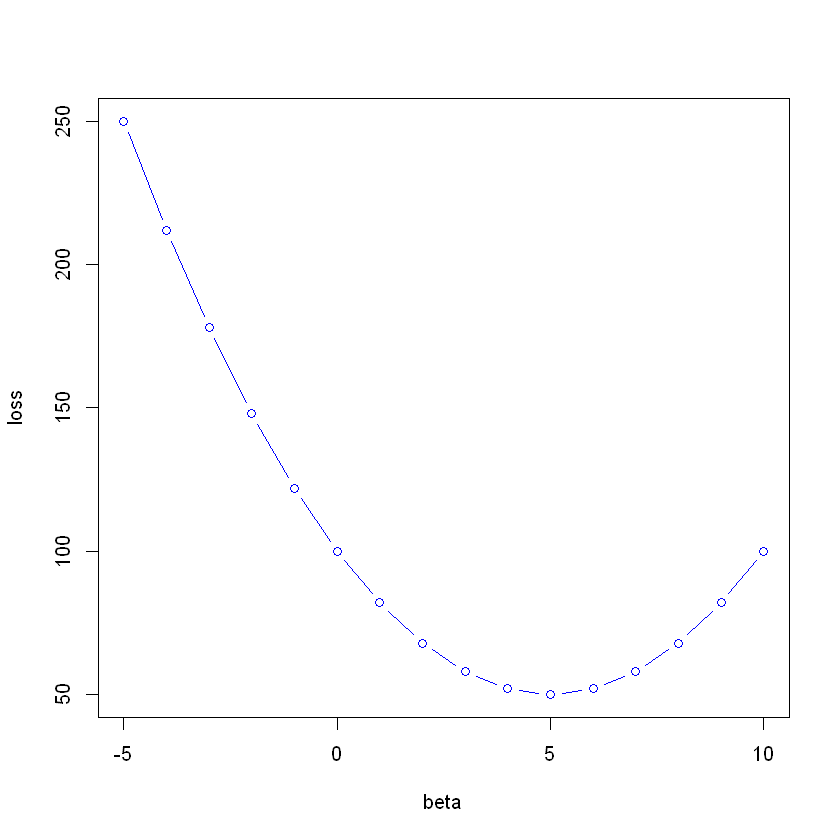

In [63]:
x=-5:10
plot(x, Ridge_loss1D(10, 1, x), type="b", col = "blue", xlab = "beta", ylab = "loss")

Minimum is at 1/(1+lambda)=5

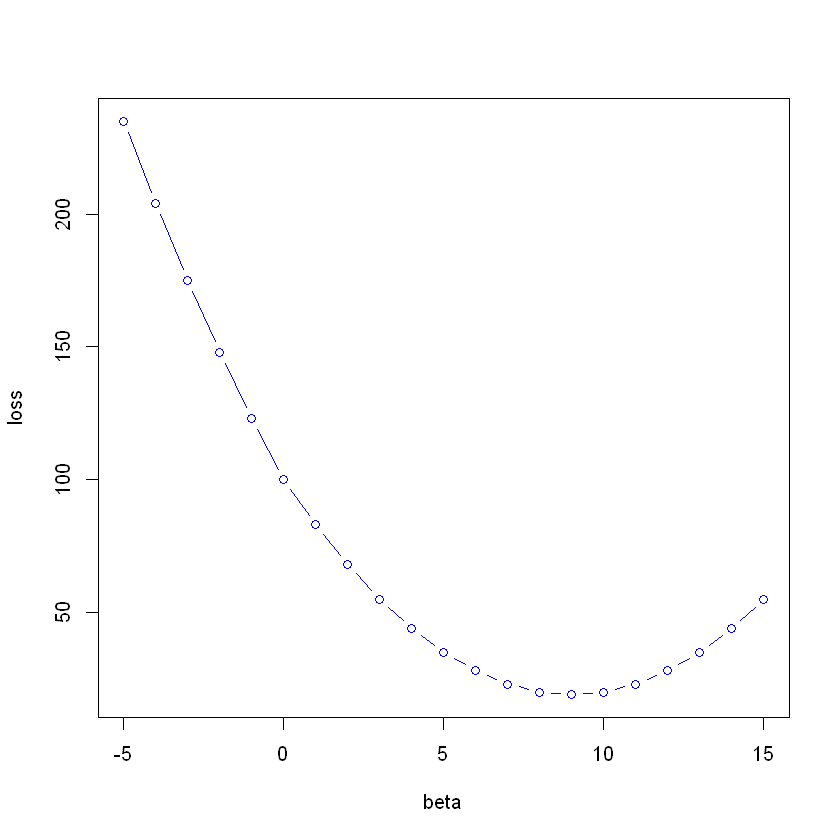

In [64]:
x=-5:15
plot(x, Lasso_loss1D(10, 2, x), type="b", col = "blue", xlab = "beta", ylab = "loss")

Minimum is at y-lambda/2=9

## Problem 7

(a) The likelihood is $f(Y|X, \beta)=1/\sqrt{2\pi\sigma^2}exp(-(y-\sum_{i=1}^p\beta_{i}x_i)^2/(2\sigma^2))$

(b)  Posterior is $1/(b\sqrt{2\pi\sigma^2})exp(-(y-\sum_{i=1}^p\beta_{i}x_i)^2/(2\sigma^2)-\sum_{i=1}^p|\beta_i|/b)$

(c) In case (b) maximum of distribution, mode, will not coincide with mean. Condition of maximum of distribution will be the same a minimization of Lasso.

(d)  Posterior is $1/(b\sqrt{2\pi\sigma^2})exp(-(y-\sum_{i=1}^p\beta_{i}x_i)^2/(2\sigma^2)-\sum_{i=1}^p\beta_i^2/c)$

(e) In case (d) maximum of distribution will be mode and mean. Condition of maximum of distribution will be the same a minimization of Ridge.


## Functions

In [112]:
regsubresult=function(reg.sum){
    print('Adjusted R2')
    print(which.max(reg.sum$adjr2))
    print(max(reg.sum$adjr2))
    print("C_p")
    print(which.min(reg.sum$cp))
    print(min(reg.sum$cp))
    print("BIC")
    print(which.min(reg.sum$bic))
    print(min(reg.sum$bic))
}
regsubplot=function(reg.sum){
    par(mfrow = c(2, 2))
    plot(1:8, reg.sum$adjr2, type="b", col="blue", xlab = "Model", ylab = "R2")
    plot(1:8, reg.sum$cp, type="b", col="blue",xlab = "Model", ylab = "C_p")
    plot(1:8, reg.sum$bic, type="b", , col = "blue", xlab = "Model", ylab = "BIC")
   }

modelsMSE = function(reg.fit, formula, df, out,  n){
    df.mat = model.matrix(formula, data = df, nvmax = n)
    val.mse = rep(NA, n)
    for (i in 1:n) {
        coef = coef(reg.fit, id = i)
        pred = df.mat[, names(coef)] %*% coef
        val.mse[i] = mean((pred - out)^2)
    }
    return(val.mse)
}

## Libraries

In [113]:
library(ISLR)
#install.packages("pls", repos='http://cran.us.r-project.org')
library(leaps)
library(glmnet)
library(MASS)
library(pls)

## Problem 8

In [114]:
X=rnorm(100)
eps=rnorm(100)

In [115]:
Y = 2+X+3*X^2+2*X^3+eps
df = data.frame(X, Y)

In [116]:
reg.fit=regsubsets(Y~poly(X,10), data=df)
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10), data = df)
10 Variables  (and intercept)
              Forced in Forced out
poly(X, 10)1      FALSE      FALSE
poly(X, 10)2      FALSE      FALSE
poly(X, 10)3      FALSE      FALSE
poly(X, 10)4      FALSE      FALSE
poly(X, 10)5      FALSE      FALSE
poly(X, 10)6      FALSE      FALSE
poly(X, 10)7      FALSE      FALSE
poly(X, 10)8      FALSE      FALSE
poly(X, 10)9      FALSE      FALSE
poly(X, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 poly(X, 10)4 poly(X, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          " "          "*"          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          "*"          " "         
5  ( 1 ) "*"          "*"          "*"          "*"          "*"         
6

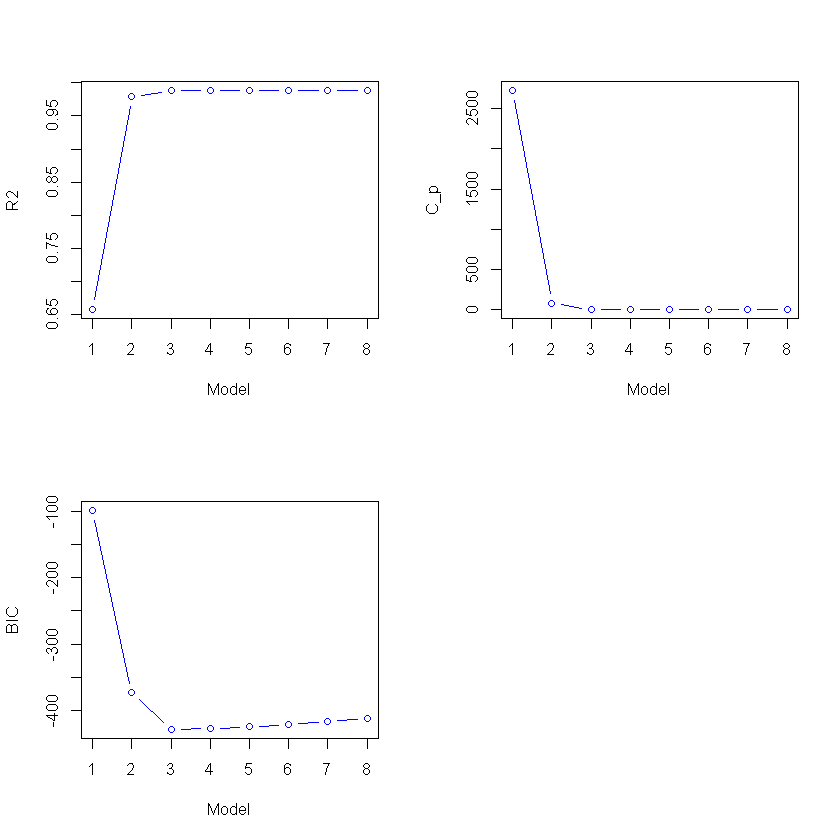

In [117]:
regsubplot(reg.sum)

In [118]:
regsubresult(reg.sum)

[1] "Adjusted R2"
[1] 6
[1] 0.9884909
[1] "C_p"
[1] 4
[1] 2.789179
[1] "BIC"
[1] 3
[1] -428.2812


In [119]:
reg.fit=regsubsets(Y~poly(X,10), data=df, method="forward")
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10), data = df, method = "forward")
10 Variables  (and intercept)
              Forced in Forced out
poly(X, 10)1      FALSE      FALSE
poly(X, 10)2      FALSE      FALSE
poly(X, 10)3      FALSE      FALSE
poly(X, 10)4      FALSE      FALSE
poly(X, 10)5      FALSE      FALSE
poly(X, 10)6      FALSE      FALSE
poly(X, 10)7      FALSE      FALSE
poly(X, 10)8      FALSE      FALSE
poly(X, 10)9      FALSE      FALSE
poly(X, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 poly(X, 10)4 poly(X, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          " "          "*"          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          "*"          " "         
5  ( 1 ) "*"          "*"          "*"          "*"       

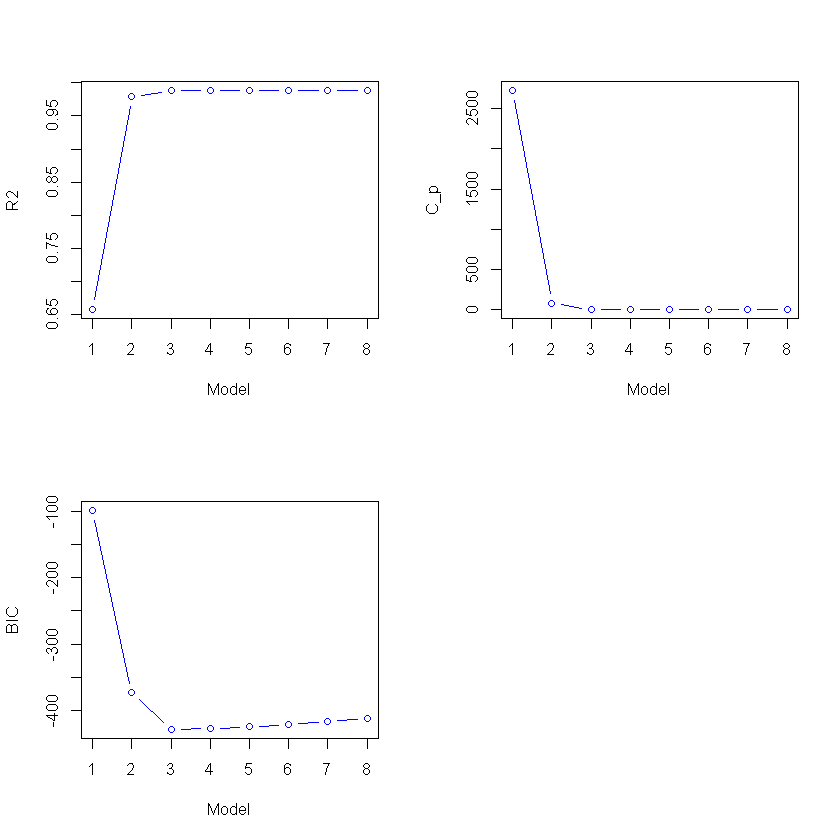

In [120]:
regsubplot(reg.sum)

In [121]:
regsubresult(reg.sum)

[1] "Adjusted R2"
[1] 6
[1] 0.9884909
[1] "C_p"
[1] 4
[1] 2.789179
[1] "BIC"
[1] 3
[1] -428.2812


In [122]:
reg.fit=regsubsets(Y~poly(X,10), data=df, method="backward")
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10), data = df, method = "backward")
10 Variables  (and intercept)
              Forced in Forced out
poly(X, 10)1      FALSE      FALSE
poly(X, 10)2      FALSE      FALSE
poly(X, 10)3      FALSE      FALSE
poly(X, 10)4      FALSE      FALSE
poly(X, 10)5      FALSE      FALSE
poly(X, 10)6      FALSE      FALSE
poly(X, 10)7      FALSE      FALSE
poly(X, 10)8      FALSE      FALSE
poly(X, 10)9      FALSE      FALSE
poly(X, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 poly(X, 10)4 poly(X, 10)5
1  ( 1 ) "*"          " "          " "          " "          " "         
2  ( 1 ) "*"          " "          "*"          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          "*"          " "         
5  ( 1 ) "*"          "*"          "*"          "*"     

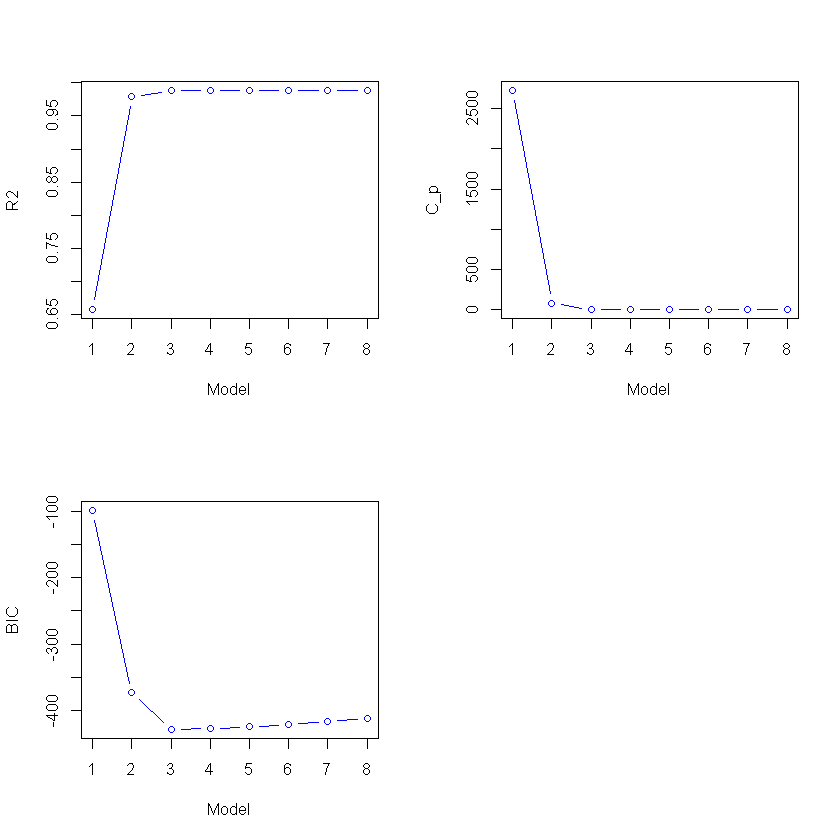

In [123]:
regsubplot(reg.sum)

In [124]:
regsubresult(reg.sum)

[1] "Adjusted R2"
[1] 6
[1] 0.9884909
[1] "C_p"
[1] 4
[1] 2.789179
[1] "BIC"
[1] 3
[1] -428.2812


In all cases the result is the same. BIC has best minimum value for model 3 (y~x+x^2+x^3), cp for model 4(y~x+x^2+x^3+x^6), and R2 has max for model 5 (y~x+x^2+x^3+x^5+x^6). All these models have close R2, BIC, Cp.

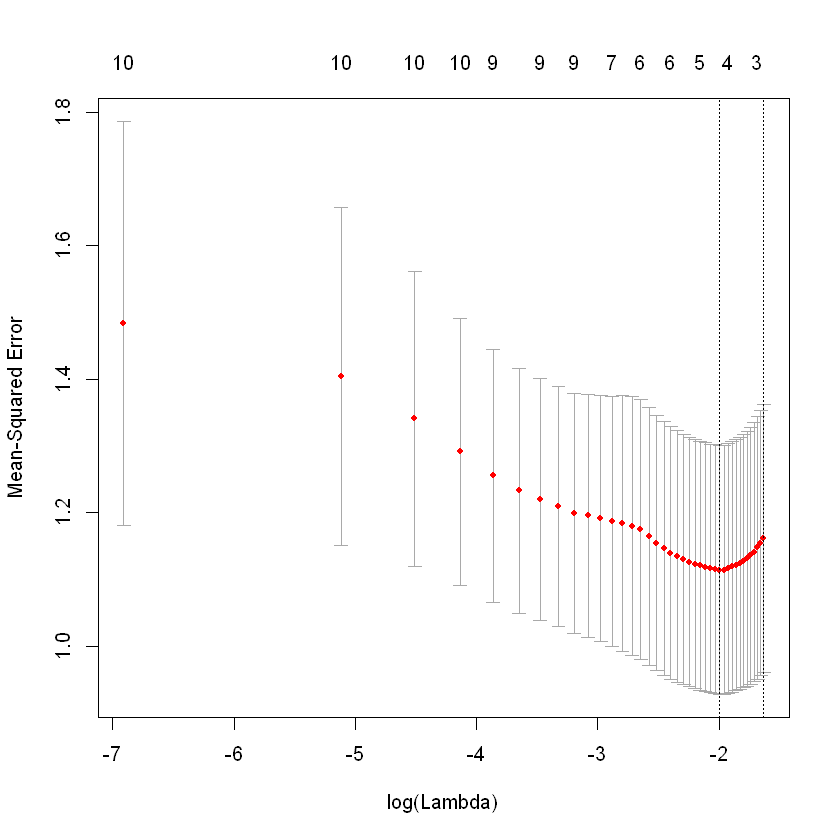

In [125]:
cv.lasso = cv.glmnet(poly(X, 10), Y, alpha=1, lambda=seq(0.001, 0.2, by = 0.005))
plot(cv.lasso)

The smallest error is for $\lambda \approx 2*10^{-3}$

In [126]:
Y = 2+0.5*X^7
df = data.frame(X,Y)

In [127]:
reg.fit=regsubsets(Y~poly(X,10), data=df)
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(Y ~ poly(X, 10), data = df)
10 Variables  (and intercept)
              Forced in Forced out
poly(X, 10)1      FALSE      FALSE
poly(X, 10)2      FALSE      FALSE
poly(X, 10)3      FALSE      FALSE
poly(X, 10)4      FALSE      FALSE
poly(X, 10)5      FALSE      FALSE
poly(X, 10)6      FALSE      FALSE
poly(X, 10)7      FALSE      FALSE
poly(X, 10)8      FALSE      FALSE
poly(X, 10)9      FALSE      FALSE
poly(X, 10)10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         poly(X, 10)1 poly(X, 10)2 poly(X, 10)3 poly(X, 10)4 poly(X, 10)5
1  ( 1 ) " "          "*"          " "          " "          " "         
2  ( 1 ) " "          "*"          "*"          " "          " "         
3  ( 1 ) "*"          "*"          "*"          " "          " "         
4  ( 1 ) "*"          "*"          "*"          "*"          " "         
5  ( 1 ) "*"          "*"          "*"          "*"          "*"         
6

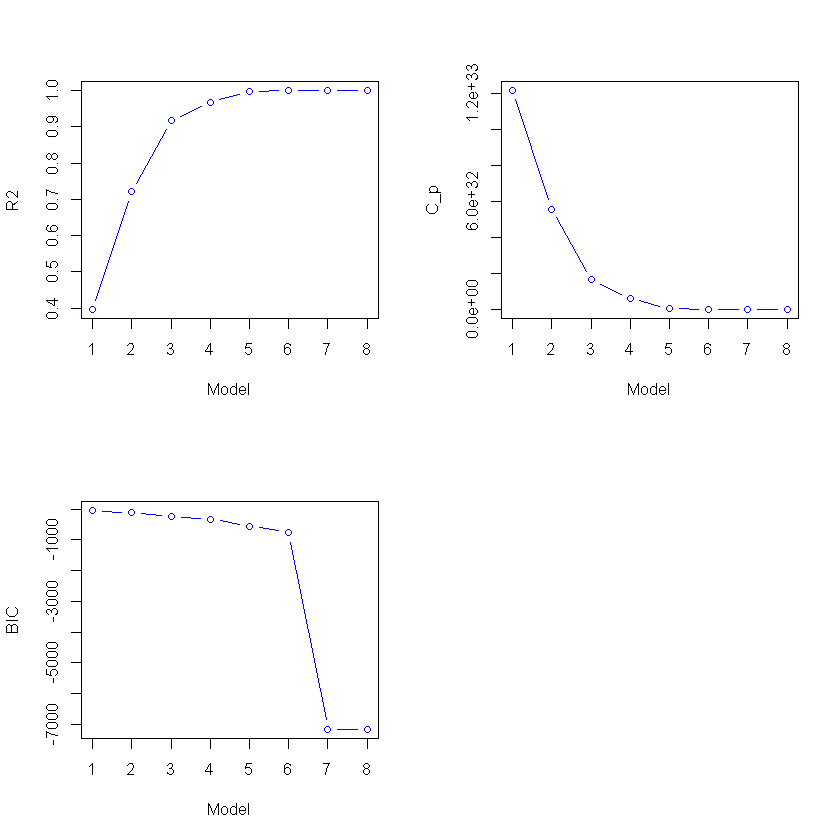

In [128]:
regsubplot(reg.sum)

In [129]:
regsubresult(reg.sum)

[1] "Adjusted R2"
[1] 7
[1] 1
[1] "C_p"
[1] 8
[1] 15.42644
[1] "BIC"
[1] 8
[1] -7170.277


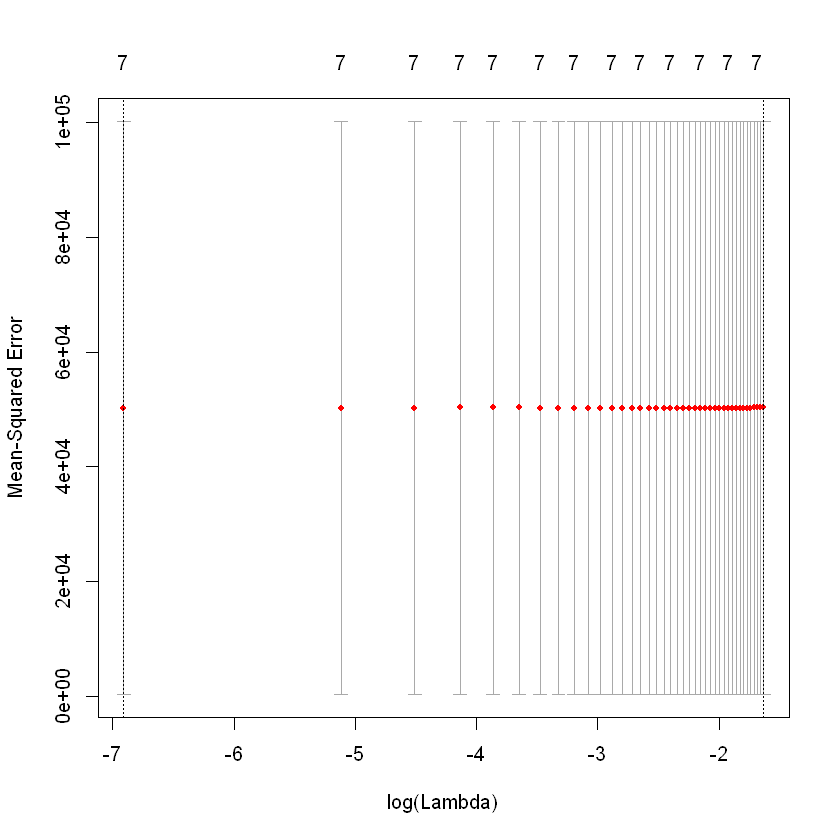

In [130]:
cv.lasso = cv.glmnet(poly(X, 10), Y, alpha=1, lambda=seq(0.001, 0.2, by = 0.005))
plot(cv.lasso)

## Problem 9

See python notebook

## Problem 10

In [131]:
set.seed(1)
x = matrix(rnorm(1000 * 20), 1000, 20)
b = rnorm(20)
b[5] = 0
b[10] = 0
b[12] = 0
b[19] = 0
b[20] = 0
eps = rnorm(1000)
y = x %*% b + eps

In [132]:
set.seed(3)
train=sample(seq(1000), 100, replace = FALSE)
df = data.frame(x,y)
df_train = df[train,]
df_test = df[-train,]

In [133]:
reg.fit=regsubsets(y~., data=df[train,], nvmax = 20)
reg.sum=summary(reg.fit)
reg.sum

Subset selection object
Call: regsubsets.formula(y ~ ., data = df[train, ], nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
X1      FALSE      FALSE
X2      FALSE      FALSE
X3      FALSE      FALSE
X4      FALSE      FALSE
X5      FALSE      FALSE
X6      FALSE      FALSE
X7      FALSE      FALSE
X8      FALSE      FALSE
X9      FALSE      FALSE
X10     FALSE      FALSE
X11     FALSE      FALSE
X12     FALSE      FALSE
X13     FALSE      FALSE
X14     FALSE      FALSE
X15     FALSE      FALSE
X16     FALSE      FALSE
X17     FALSE      FALSE
X18     FALSE      FALSE
X19     FALSE      FALSE
X20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 X11 X12 X13 X14 X15 X16 X17
1  ( 1 )  " " " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " " " "*" " " " " " " " " "*" " " " " " " " " " " " " " " " "
3  ( 1 )  " " " " " " "*" " " " " "*" " " "*" " " " " " " "

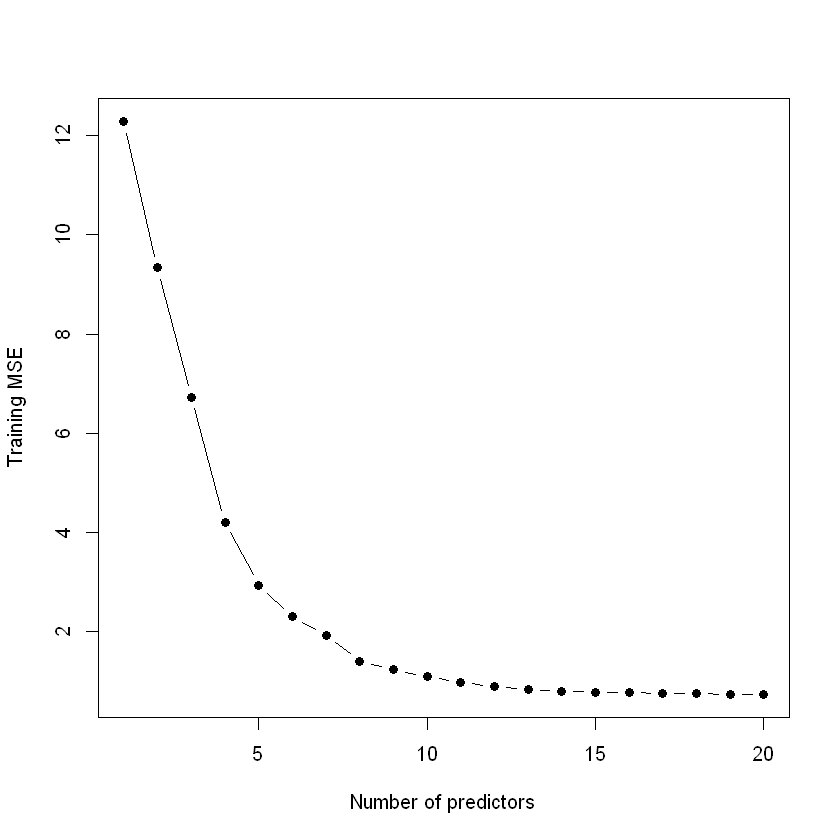

In [134]:
val.mse = modelsMSE(reg.fit, y~., df_train, df_train$y, 20)
plot(val.mse, xlab = "Number of predictors", ylab = "Training MSE", pch = 19, type = "b")

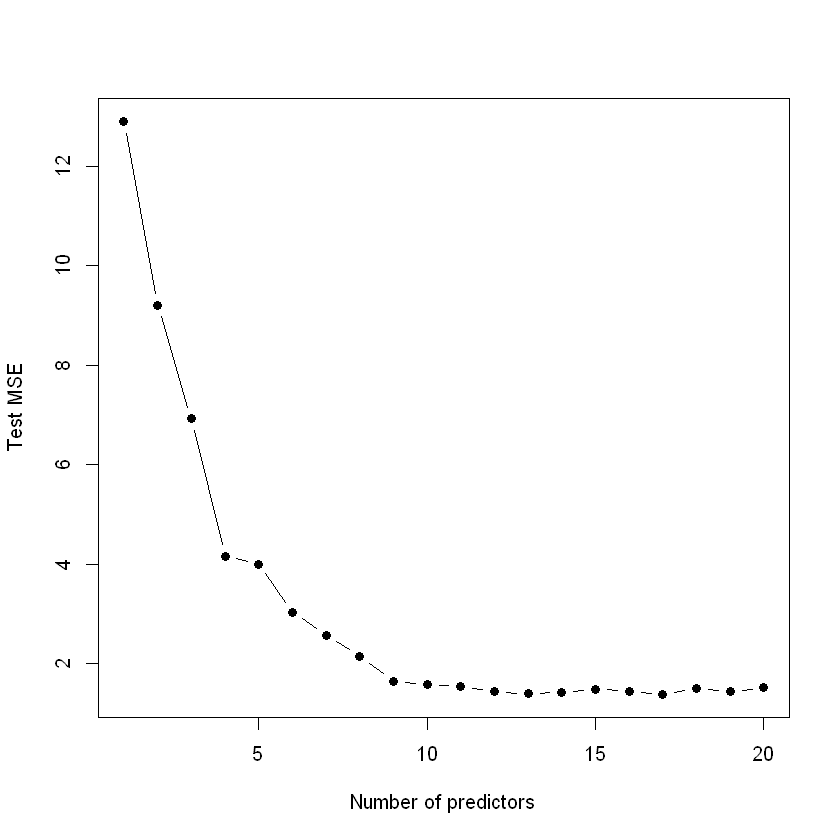

In [135]:
val.mse = modelsMSE(reg.fit,  y~., df_test, df_test$y, 20)
plot(val.mse, xlab = "Number of predictors", ylab = "Test MSE", pch = 19, type = "b")

For test MSE the best result is for model with 17 predictors. Training MSE goes down as number of predictors increases as expected. 

In [136]:
set.seed(6)
x = matrix(rnorm(1000 * 20), 1000, 20)
b = rnorm(20)
b[8] = 0
b[10] =0
b[12] = 0
b[15] =0
b[18] =0
b[19] = 0
eps = rnorm(1000)
y = x %*% b + eps

In [137]:
set.seed(3)
train=sample(seq(1000), 100, replace = FALSE)
df = data.frame(x,y)
df_train = df[train,]
df_test = df[-train,]

In [138]:
reg.fit=regsubsets(y~., data=df[train,], nvmax = 20)

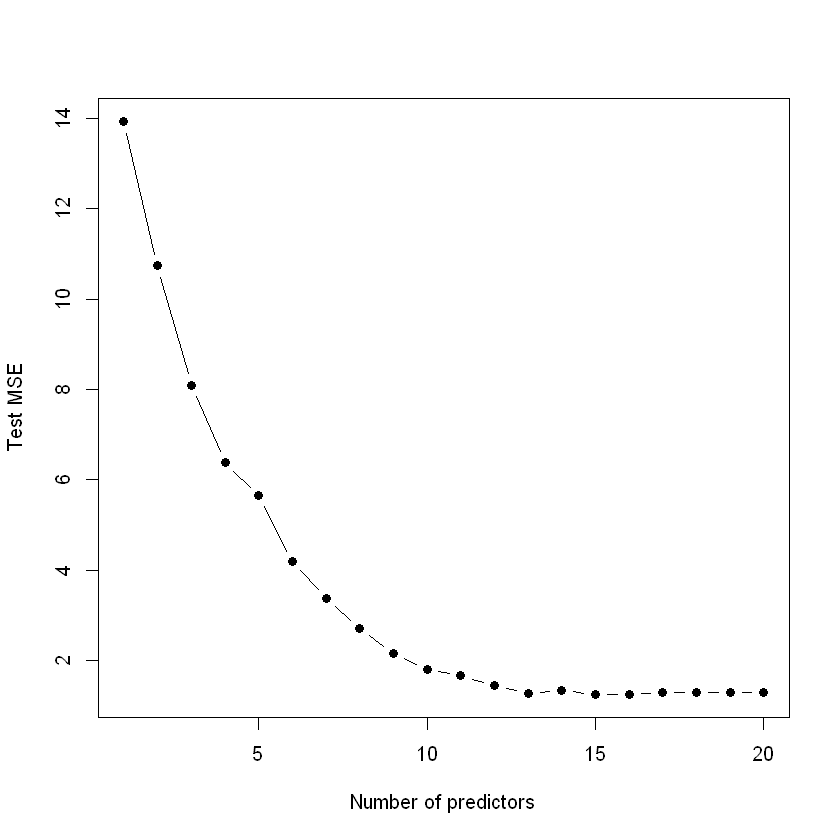

In [139]:
val.mse = modelsMSE(reg.fit, y~., df_test, df_test$y, 20)
plot(val.mse, xlab = "Number of predictors", ylab = "Test MSE", pch = 19, type = "b")

The best model has 15 predictors

In [140]:
n=20
df.mat = model.matrix(y ~ ., data = df, nvmax = n) 
coef.errors = rep(NA, n)
x_cols=names(df)[1:n-1]
for (i in 1:n) {
        coef = coef(reg.fit, id = i)
        coef.errors[i] <- sqrt(sum((b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols])^2) + sum(b[!(x_cols %in% names(coef))])^2)
    }
print(coef.errors)

Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object length"Warning message in b[x_cols %in% names(coef)] - coef[names(coef) %in% x_cols]:
"longer object length is not a multiple of shorter object

 [1] 3.5772132 1.7253212 0.3471389 1.3010892 0.4240169 1.4583084 0.6598482
 [8] 1.5548729 1.3040795 1.3178639 1.3286716 1.4597126 1.3562068 1.3805037
[15] 1.3535657 1.3501153 1.3527312 1.3559252 1.3562862 1.3530211


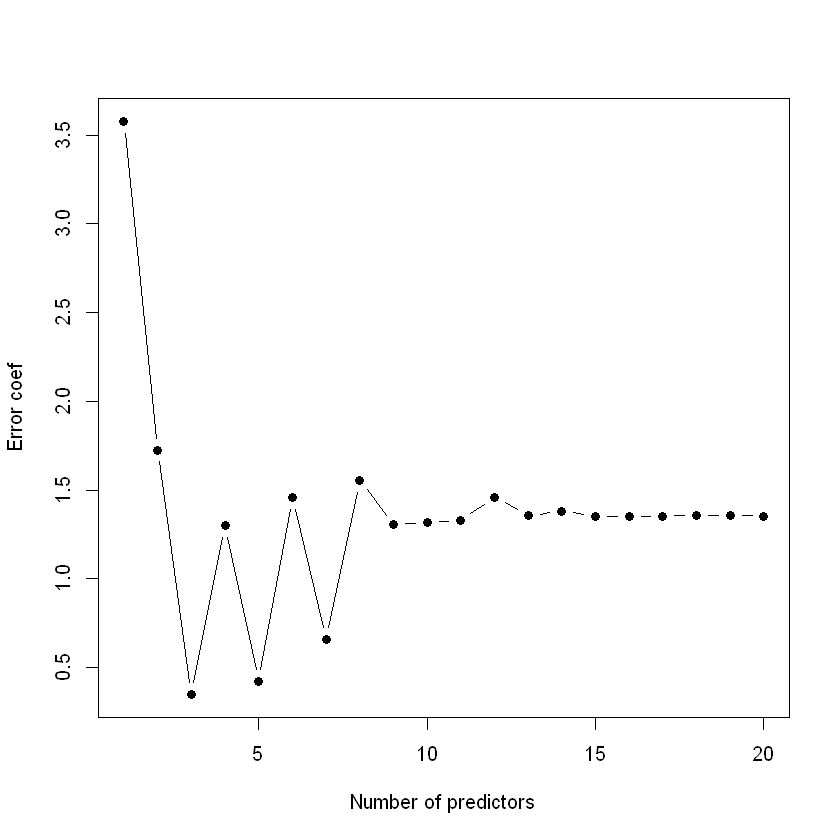

In [141]:
plot(coef.errors, xlab = "Number of predictors", ylab = "Error coef", pch = 19, type = "b")

## Problem 11

In [142]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [143]:
dim(Boston)

[1] 506  14

In [144]:
set.seed(1)
test=sample(seq(dim(Boston)[1]), 50, replace = FALSE)
df_train = Boston[-test,]
df_test = Boston[test,]

In [145]:
reg.fit=regsubsets(crim~., data=Boston[train,], nvmax = 13)
reg.sum=summary(reg.fit)
print(reg.sum)

Subset selection object
Call: regsubsets.formula(crim ~ ., data = Boston[train, ], nvmax = 13)
13 Variables  (and intercept)
        Forced in Forced out
zn          FALSE      FALSE
indus       FALSE      FALSE
chas        FALSE      FALSE
nox         FALSE      FALSE
rm          FALSE      FALSE
age         FALSE      FALSE
dis         FALSE      FALSE
rad         FALSE      FALSE
tax         FALSE      FALSE
ptratio     FALSE      FALSE
black       FALSE      FALSE
lstat       FALSE      FALSE
medv        FALSE      FALSE
1 subsets of each size up to 13
Selection Algorithm: exhaustive
          zn  indus chas nox rm  age dis rad tax ptratio black lstat medv
1  ( 1 )  " " " "   " "  " " " " " " " " "*" " " " "     " "   " "   " " 
2  ( 1 )  " " " "   " "  " " " " " " " " "*" " " " "     " "   "*"   " " 
3  ( 1 )  " " " "   " "  " " " " " " " " "*" " " "*"     " "   "*"   " " 
4  ( 1 )  " " " "   " "  " " "*" " " " " "*" " " " "     " "   "*"   "*" 
5  ( 1 )  " " " "   " "  " " "*" " 

 [1] 41.80294 40.92229 40.83506 42.25038 41.97759 42.14393 42.09439 41.59374
 [9] 41.55023 41.37313 41.27319 41.25401 41.24162


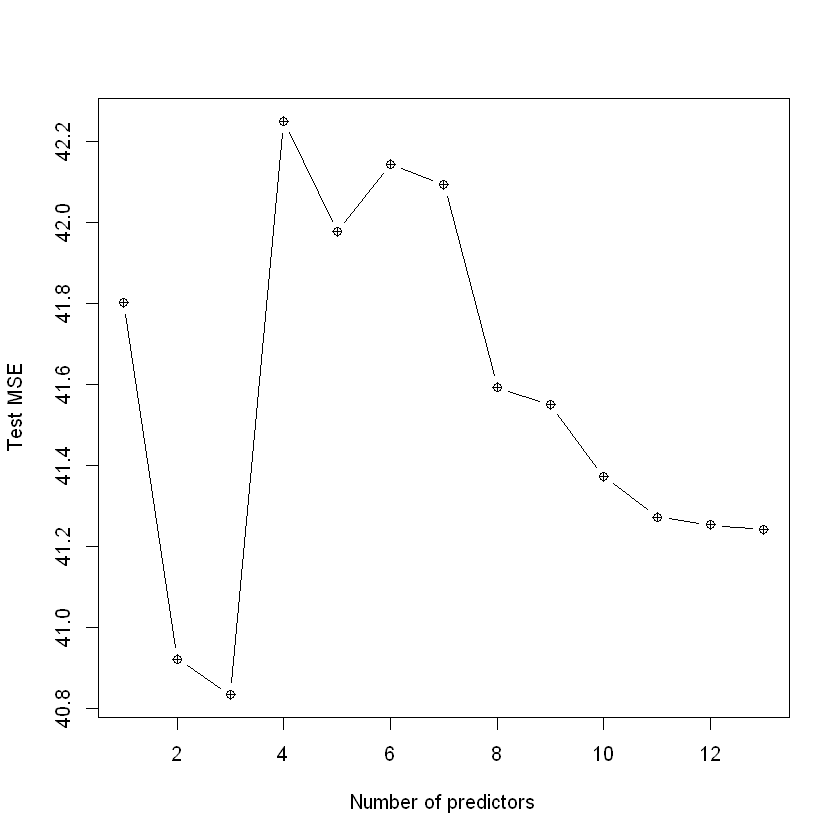

In [146]:
val.mse = modelsMSE(reg.fit, crim~., df_train, df_train$crim, 13)
print(val.mse)
plot(val.mse,  xlab = "Number of predictors", ylab = "Test MSE", pch = 10, type = "b")

The lowest test MSE is for the model with 3 predictors.

[1] 0.5899047

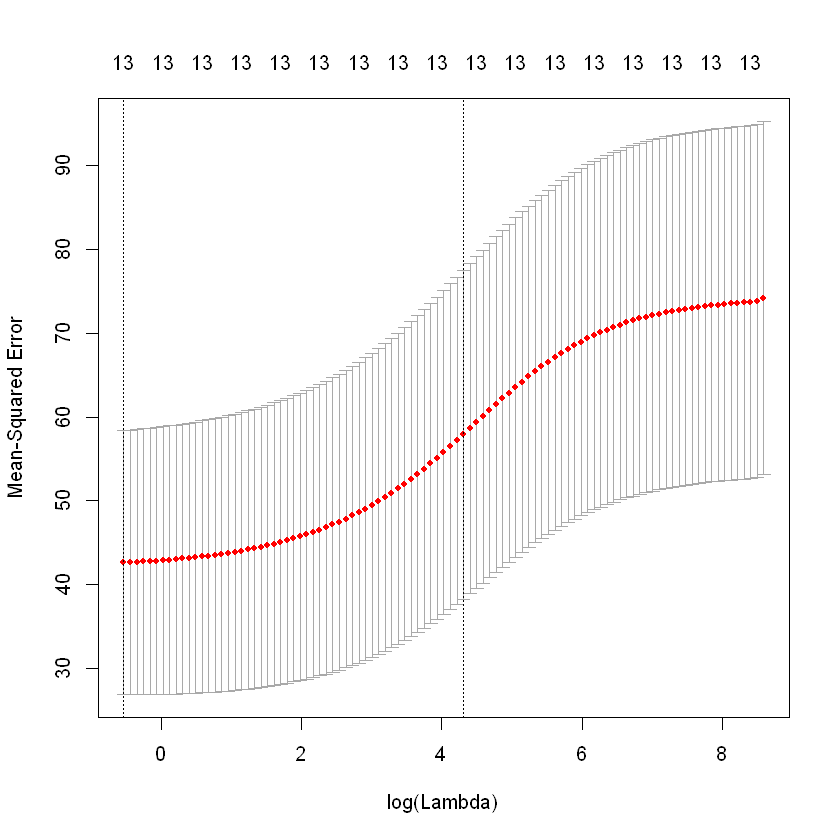

In [147]:
X = model.matrix(crim ~ ., Boston)[,-1]
ridge.mod = glmnet(X, Boston$crim, alpha=0,  lambda=seq(0.01, 1, by = 0.05))
cv.ridge = cv.glmnet(X, Boston$crim, alpha=0)
plot(cv.ridge)
bestlam=cv.ridge$lambda.min
bestlam

In [148]:
ridge.pred=predict(ridge.mod, s=bestlam, newx=X[test,])
mean((ridge.pred-df_test$crim)^2)

[1] 87.66871

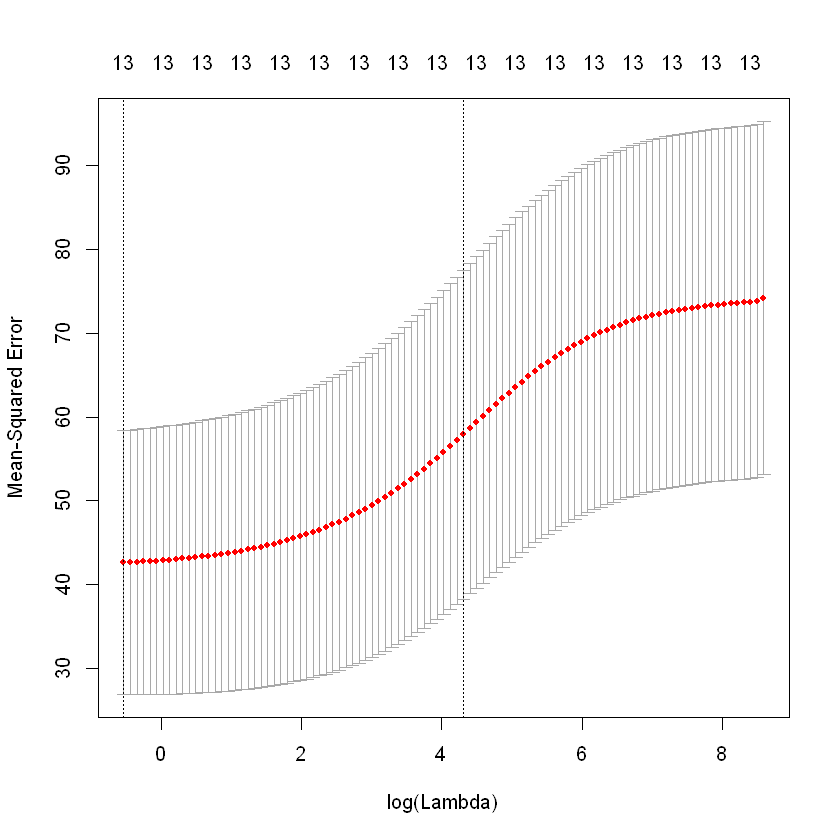

In [149]:
lasso.mod = glmnet(X, Boston$crim, alpha=1,  lambda=seq(0.01, 1, by = 0.05))
cv.lasso = cv.glmnet(X, Boston$crim, alpha=1)
plot(cv.ridge)

In [150]:
lasso.pred=predict(lasso.mod, s=bestlam, newx=X[test,])
mean((lasso.pred-df_test$crim)^2)

[1] 96.45673

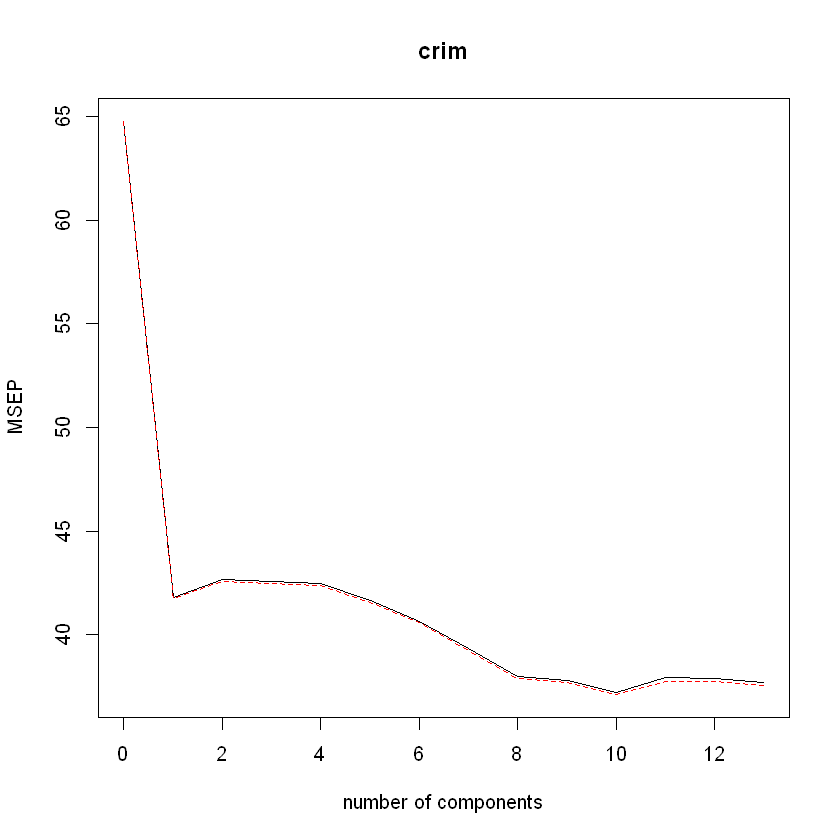

In [151]:
pcr.fit = pcr(crim~., data=df_train, validation = 'CV')
validationplot(pcr.fit, val.type="MSEP")

In [152]:
pcr.pred = predict(pcr.fit, df_test[,-1], ncomp=10)
mean((pcr.pred-df_test$crim)^2)

[1] 96.62269

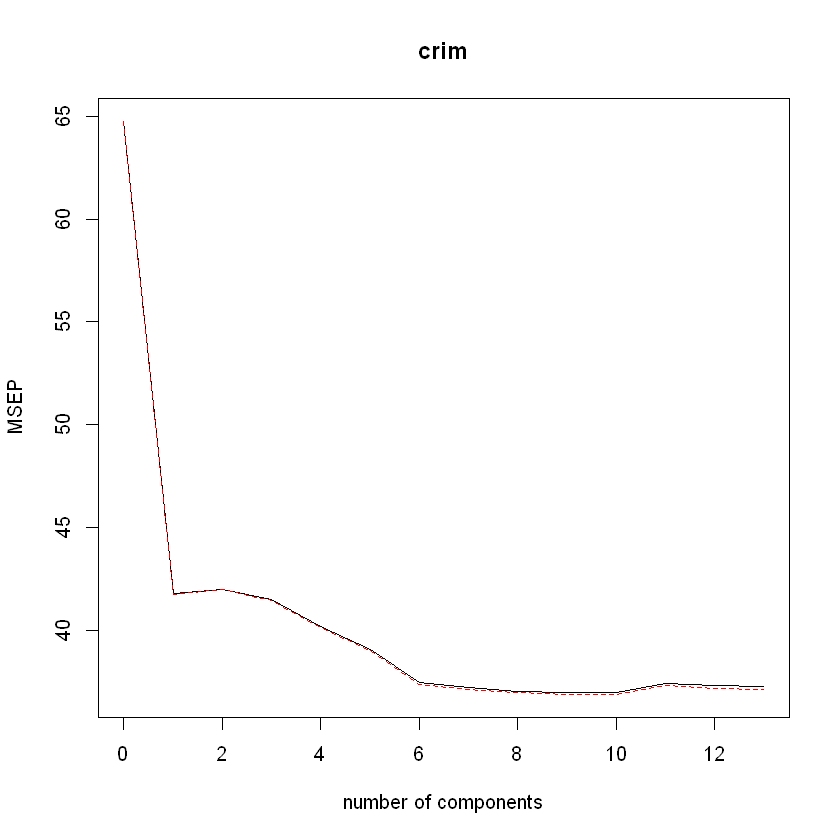

In [153]:
plsr.fit = plsr(crim~., data=df_train, validation = 'CV')
validationplot(plsr.fit, val.type="MSEP")

In [154]:
plsr.pred = predict(plsr.fit, df_test[,-1], ncomp=10)
mean((plsr.pred-df_test$crim)^2)

[1] 96.52316